<a href="https://colab.research.google.com/github/atiryunuskhan/EDA-theory/blob/main/Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Atir Yunus Khan (21BCE2707)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.cluster.hierarchy import dendrogram, linkage
import networkx as nx

In [6]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv"
df = pd.read_csv(url)


In [16]:
# Select only numeric columns and remove rows with missing values
data = df[['rectal_temp', 'pulse']].dropna()

In [17]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['rectal_temp'], y=data['pulse'], hue=labels, palette="viridis", legend="full")
    plt.title(title)
    plt.xlabel("Rectal Temperature")
    plt.ylabel("Pulse")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


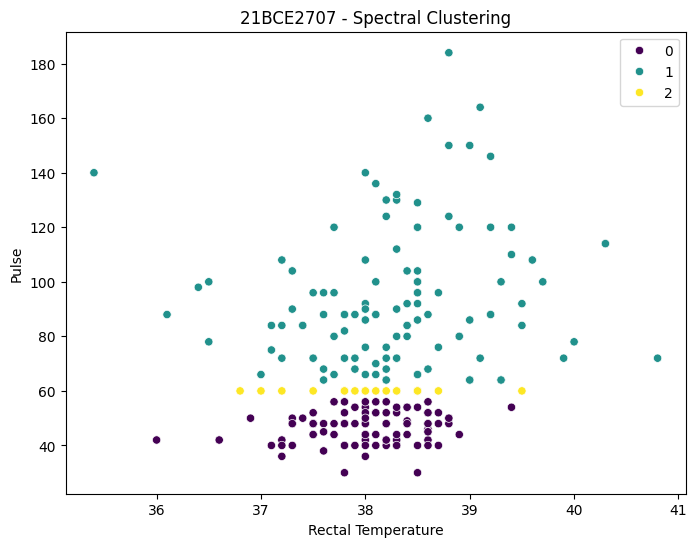

In [28]:
# 1. Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral_model.fit_predict(data)
plot_clusters(data, spectral_clusters, "21BCE2707 - Spectral Clustering")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


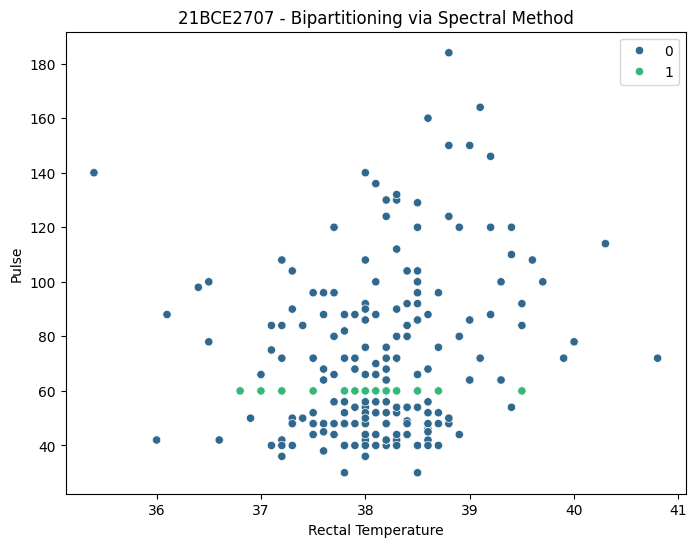

In [29]:
# 2. Bipartitioning via Spectral Method
bipartition_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
bipartition_clusters = bipartition_model.fit_predict(data)
plot_clusters(data, bipartition_clusters, "21BCE2707 - Bipartitioning via Spectral Method")

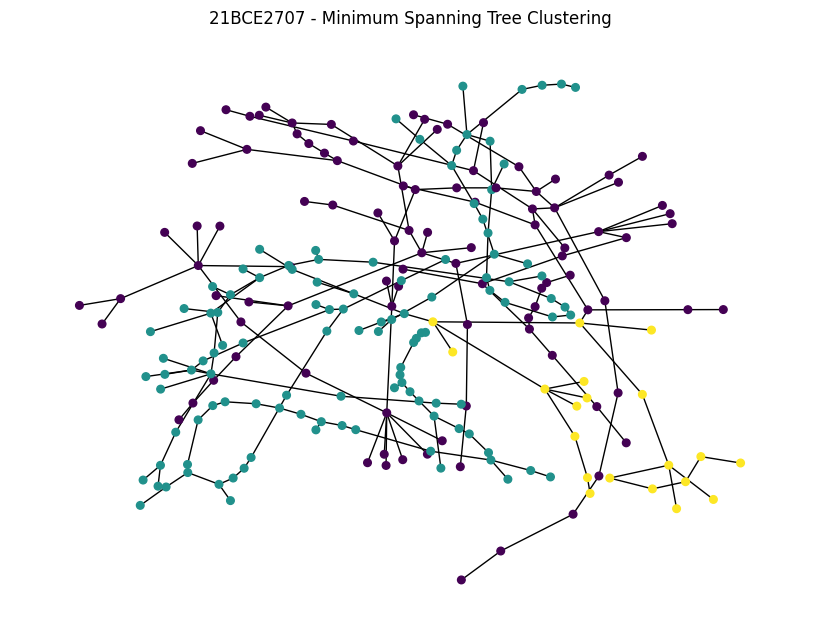

In [30]:
# 3. Minimum Spanning Tree Clustering
distance_matrix = pairwise_distances(data, metric='euclidean')
mst = minimum_spanning_tree(distance_matrix).toarray()
mst_graph = nx.from_numpy_array(mst)
plt.figure(figsize=(8, 6))
nx.draw(mst_graph, with_labels=False, node_size=30, node_color=spectral_clusters, cmap=plt.cm.viridis)
plt.title("21BCE2707 - Minimum Spanning Tree Clustering")
plt.show()

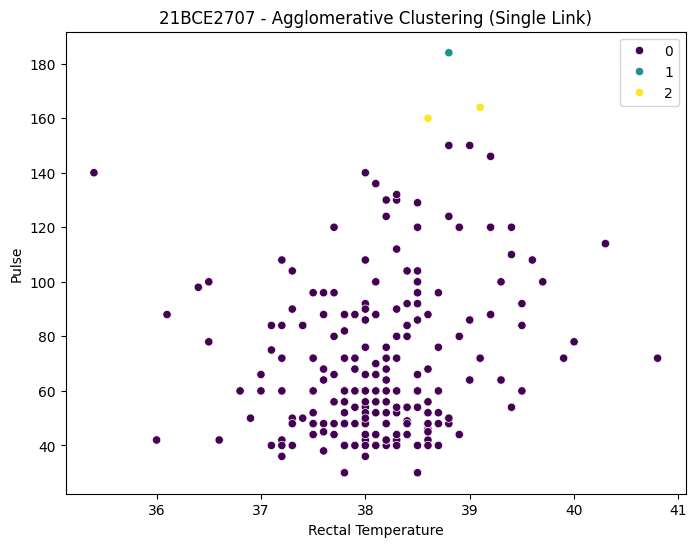

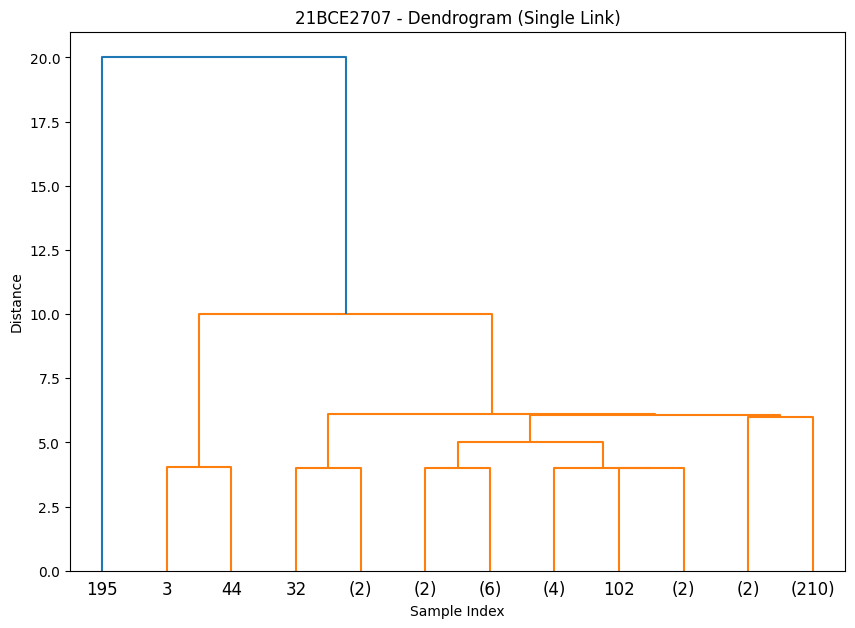

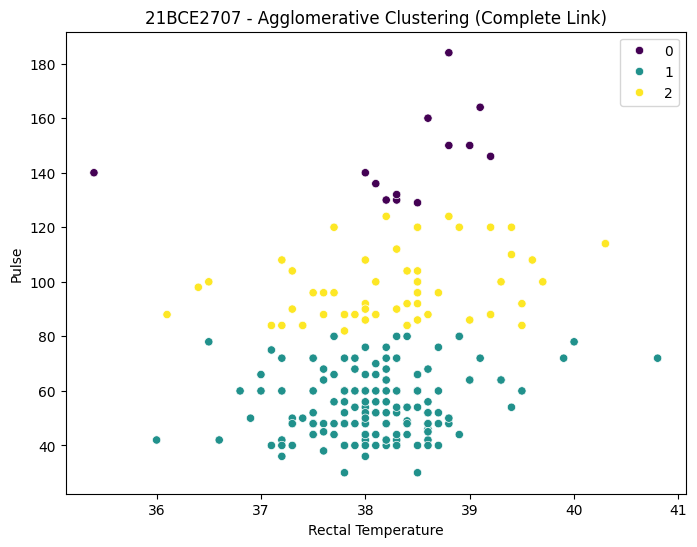

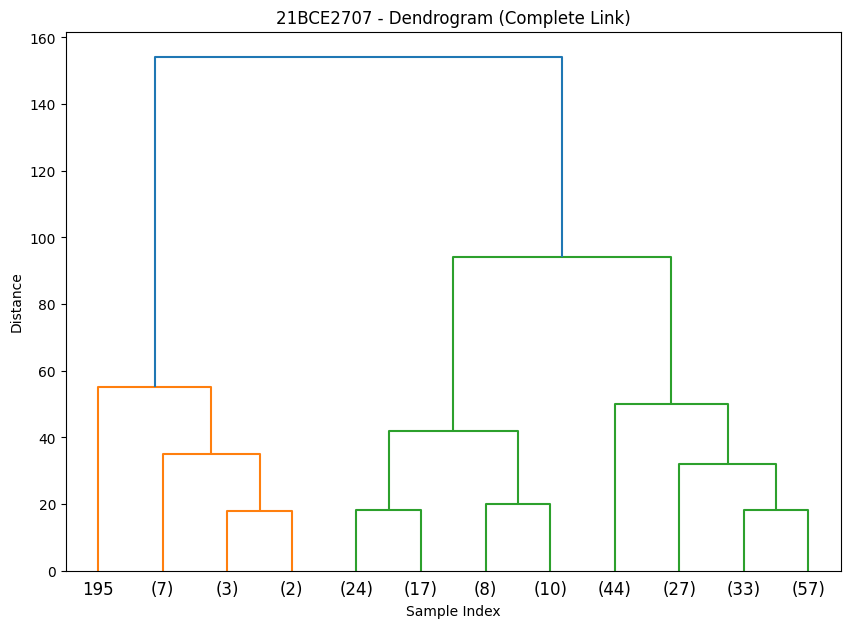

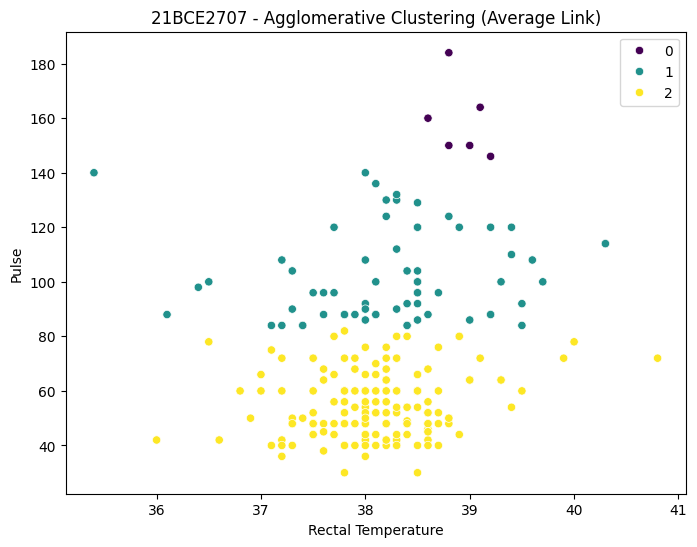

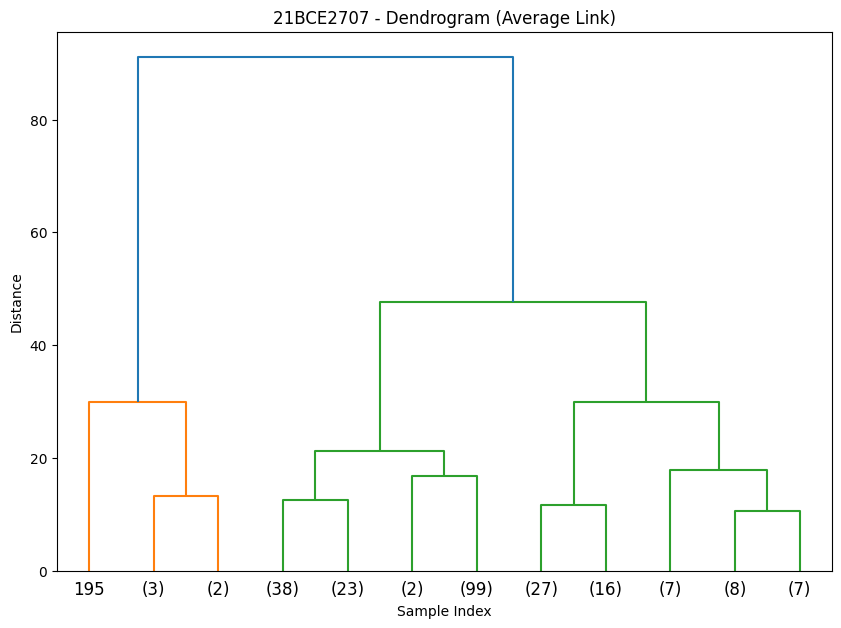

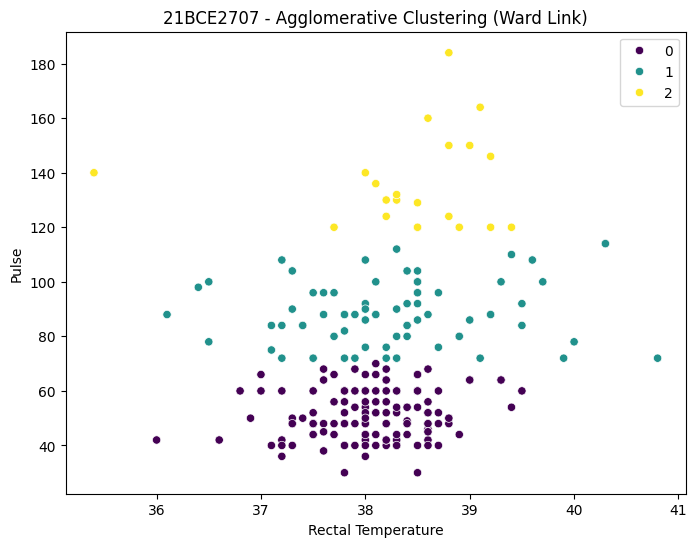

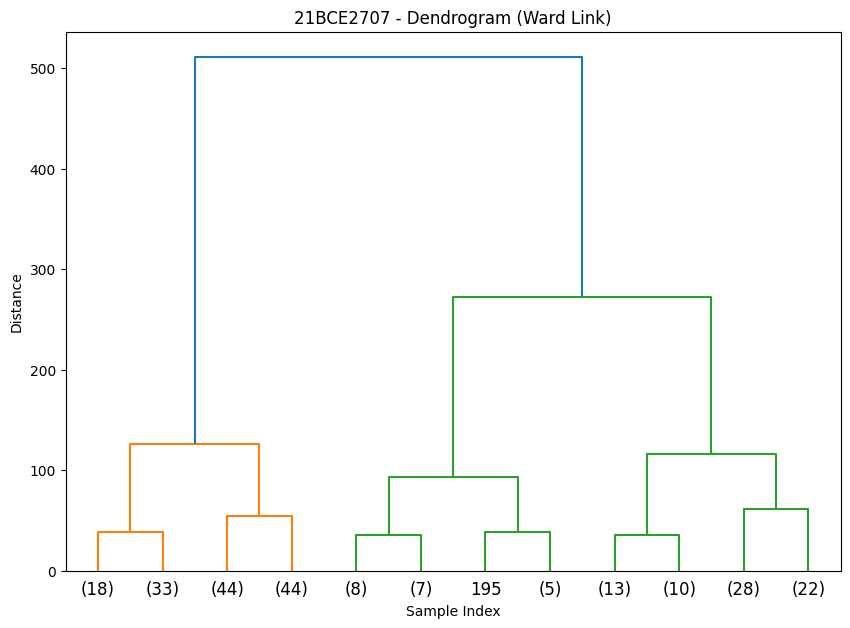

In [31]:
# 4. Agglomerative Clustering (Single, Complete, Average, Centroid)
linkage_methodslinkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    # Agglomerative Clustering
    agglom_model = AgglomerativeClustering(n_clusters=3, linkage=method)
    agglom_clusters = agglom_model.fit_predict(data)
    plot_clusters(data, agglom_clusters, f"21BCE2707 - Agglomerative Clustering ({method.capitalize()} Link)")

    # Dendrogram for each linkage method
    linked = linkage(data, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=12)
    plt.title(f"21BCE2707 - Dendrogram ({method.capitalize()} Link)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


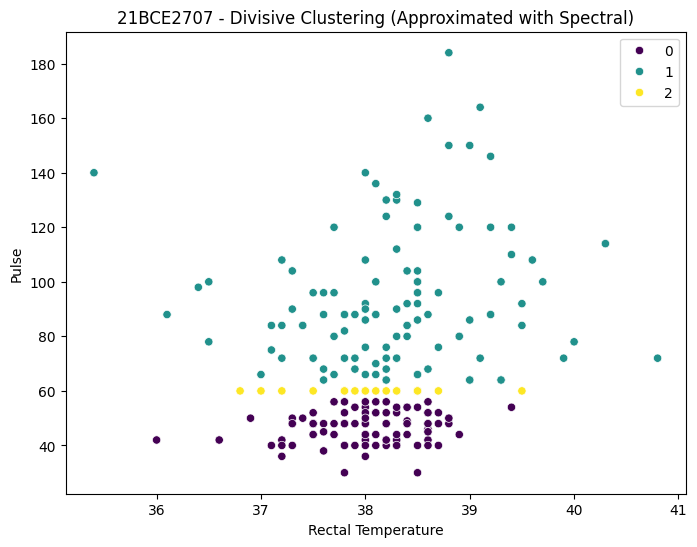

In [32]:
# 5. Divisive (Top-Down) Clustering - Approximated with Spectral Clustering
divisive_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
divisive_clusters = divisive_model.fit_predict(data)
plot_clusters(data, divisive_clusters, "21BCE2707 - Divisive Clustering (Approximated with Spectral)")

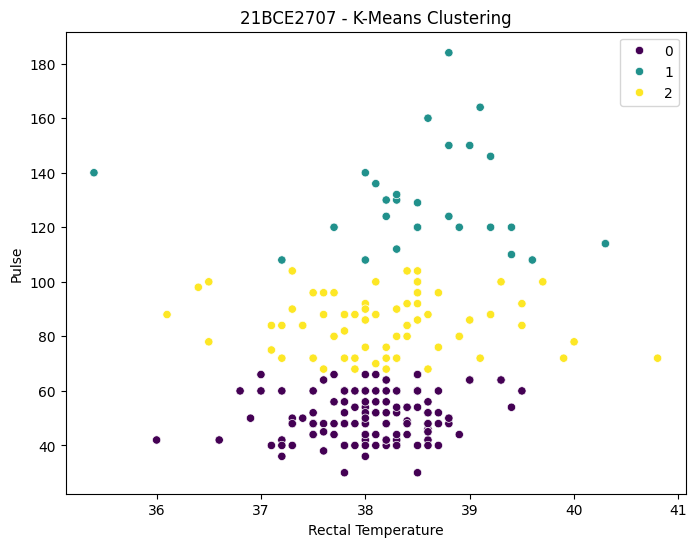

In [33]:
# 6. K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(data)
plot_clusters(data, kmeans_clusters, "21BCE2707 - K-Means Clustering")